# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
# plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
sns.set_palette('viridis')
# %matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [5]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [6]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDescription of Data Containing numerical Values:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64

Description of Data Containing numerical Values:
               Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count  1.048576e+

In [7]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
years = np.array(list(set(df['Year'])))
column_header = df.columns.tolist() # it will make easier to select column for data representation eg 0 for Year
yearly_data = df.groupby('Year') #Data grouped together on the basis of year

def individual_year(year):
    return yearly_data.get_group(year)

aggregated_data = df.groupby('Year').agg('mean')

# # Create a continuous year range (1900-2023) and reindex the data
# year_range = pd.date_range(start='1900', end='2024', freq='YE')
# aggregated_data = aggregated_data.reindex(year_range.year)
aggregated_data


,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Year,,,,
1900,14.506663,350.373405,150.408288,8.978659
1901,14.485343,349.757140,150.548828,8.947272
1902,14.476262,349.299686,152.174821,9.035554
1903,14.492360,349.644375,150.138338,9.056501
1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...
2019,14.500105,348.642249,151.020415,9.014690
2020,14.496937,350.021731,150.219741,9.054254
2021,14.501424,350.150302,150.187456,8.968700


In [8]:
# Resetting years as an index and setting as an normal columns
aggregated_data = aggregated_data.reset_index()
aggregated_data

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...,...
119,2019,14.500105,348.642249,151.020415,9.014690
120,2020,14.496937,350.021731,150.219741,9.054254
121,2021,14.501424,350.150302,150.187456,8.968700
122,2022,14.495233,350.493023,148.857646,8.942012


## 2. Univariate Analysis

Analyze each climate variable independently.

In [9]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here



In [69]:
#Univariate analysis using loop in a go

def univariate_analysis(df):
	for var in df.columns:
		if var != 'Year':
			print(f"Univariate Analysis for {var} \n ")
			# Descriptive Statistics mean, min, max, stddev ...
			print(df[var].describe(), "\n\nCreating a plots ... \n\n")


			plt.figure(figsize=(12,10))
			# Histogram using SNS histplot
			plt.subplot(2,2,1)

			sns.histplot(data=df,x=var, kde=True, bins=10, edgecolor='black')
			plt.title(f"Histogram of {var} aggregated")
			plt.xlabel(var)
			plt.ylabel('Frequency')

			# Box plot using boxplot
			plt.subplot(2,2,2)

			sns.boxplot(x = df[var],  vert = False)
			plt.title(f"Boxplot of {var} aggregated")
			plt.xlabel(var)

			# Line Plots
			plt.subplot(2,2,3)

			plt.plot(aggregated_data['Year'], aggregated_data[var], marker='o')
			plt.title(f'Trend of {var} Over Time')
			plt.xlabel('Year')
			plt.ylabel(var)
			plt.grid(False)

			# Barchart
			plt.subplot(2,2,4)
			filtered_data = df[aggregated_data['Year'] % 10 == 0]

			sns.barplot(x=filtered_data['Year'], y=filtered_data[var])

			# Add labels and title
			plt.title(f'{var} Over the Years')
			plt.xlabel('Year')
			plt.ylabel(var)
			plt.xticks(rotation=100)  # Rotate x-axis labels for better visibility

			# Show plot
			plt.grid(False)
			plt.show()


Univariate Analysis for Global Average Temperature (°C) 
 
count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64 

Creating a plots ... 




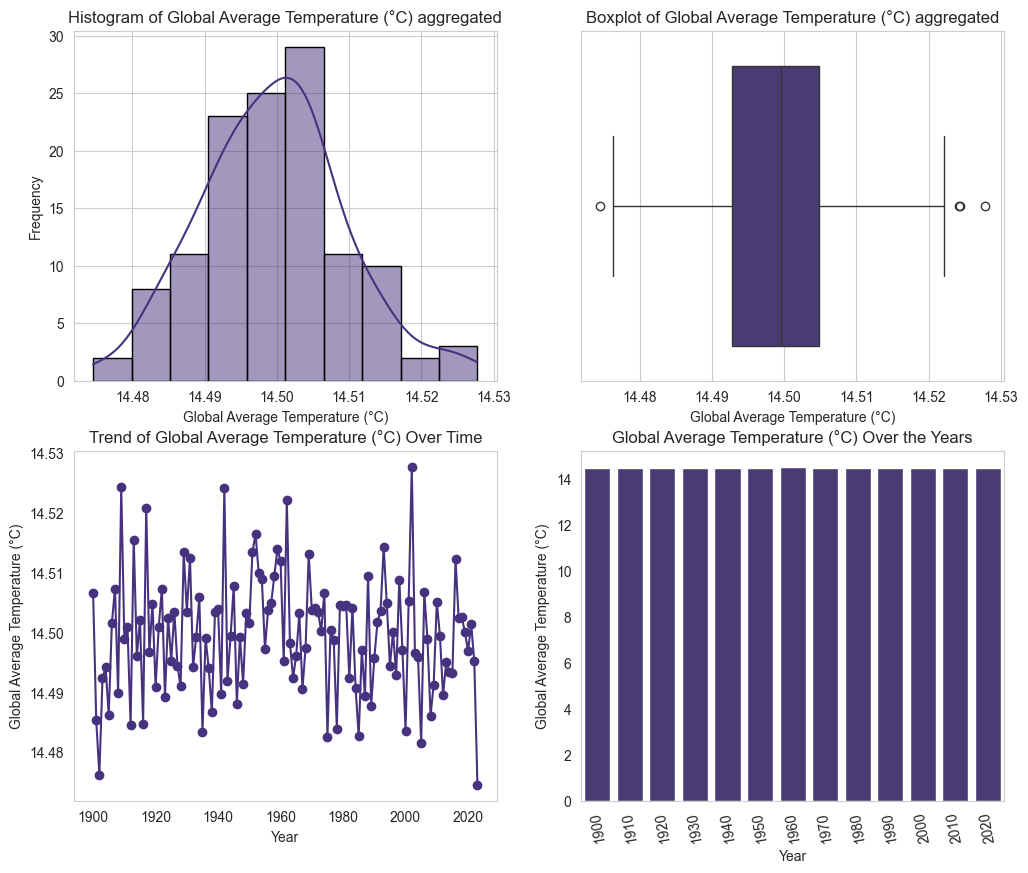

Univariate Analysis for CO2 Concentration (ppm) 
 
count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64 

Creating a plots ... 




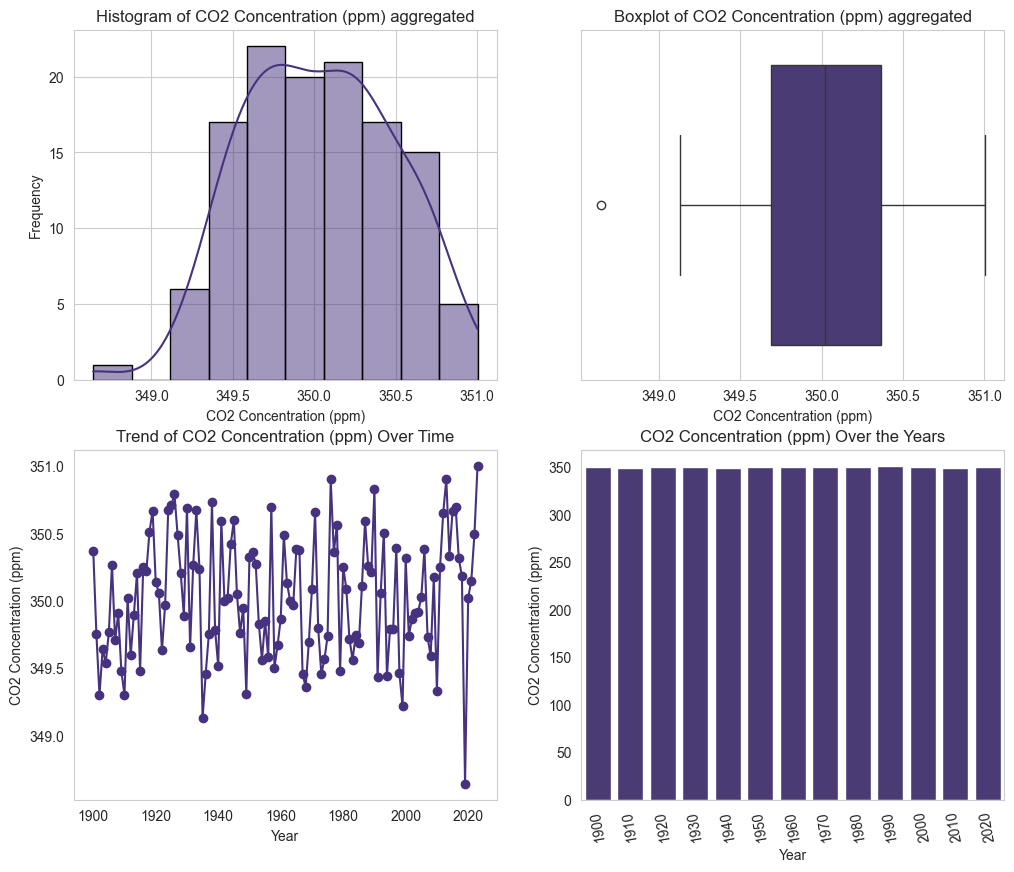

Univariate Analysis for Sea Level Rise (mm) 
 
count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64 

Creating a plots ... 




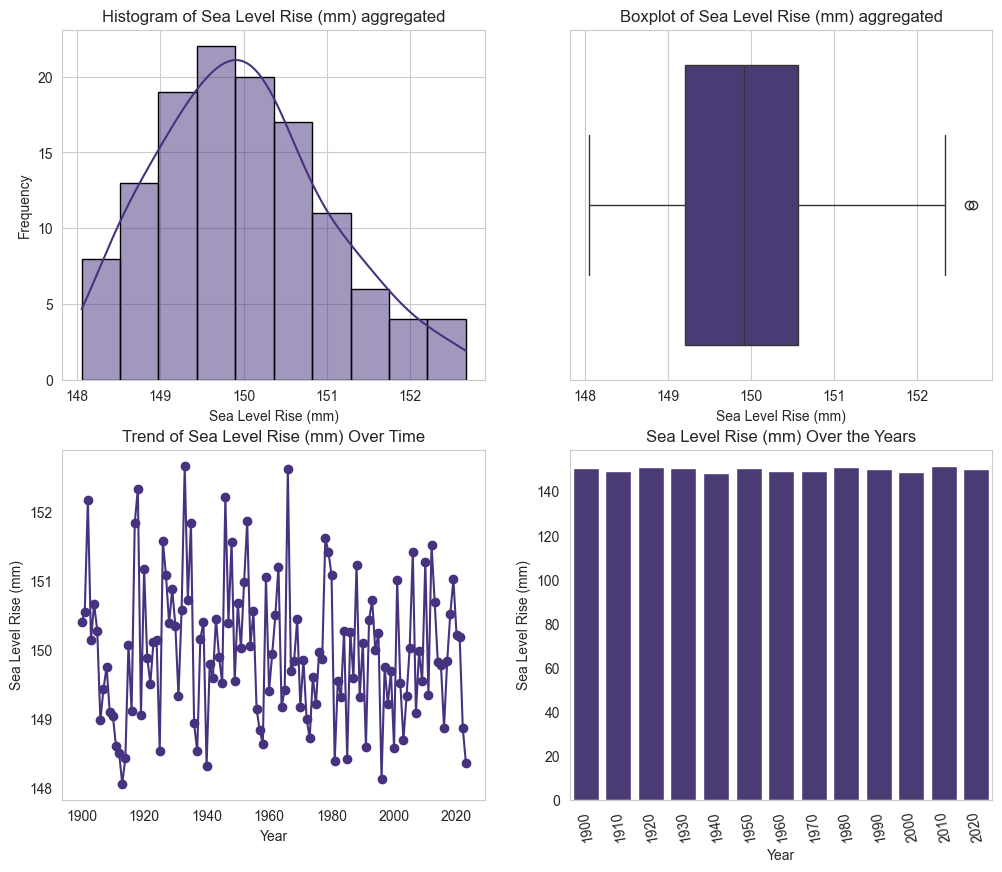

Univariate Analysis for Arctic Ice Area (million km²) 
 
count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64 

Creating a plots ... 




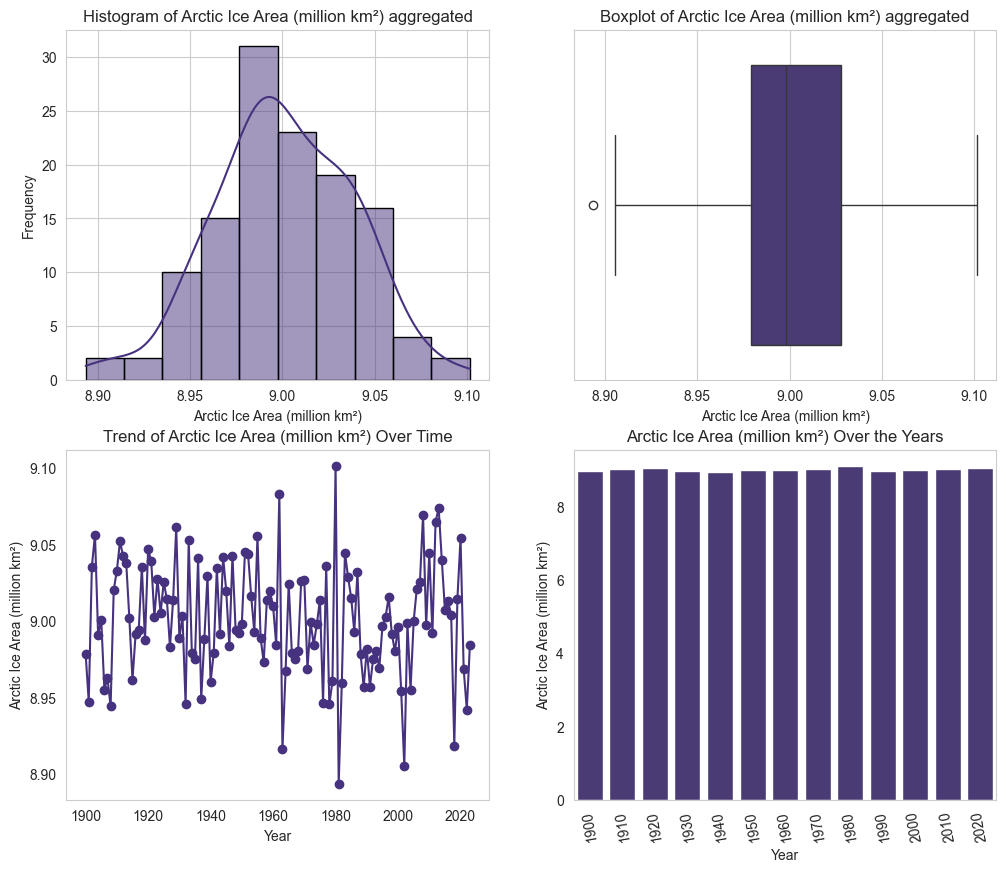

In [70]:
univariate_analysis(aggregated_data)

CO2 Concentration (ppm)


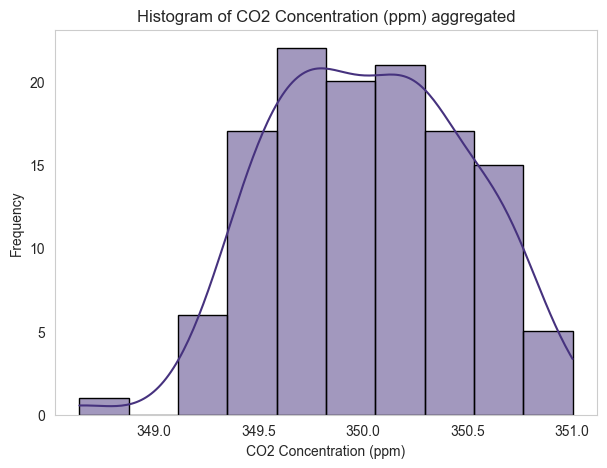

In [10]:
# Univariate Analysis for CO2 Concentration (ppm)
var = aggregated_data.columns[2]
print(var)
# Histogram using SNS histplot
plt.figure(figsize=(7,5))
sns.histplot(data=aggregated_data,x=var, kde=True, bins=10, edgecolor='black')
plt.title(f"Histogram of {var} aggregated")
plt.xlabel(var)
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

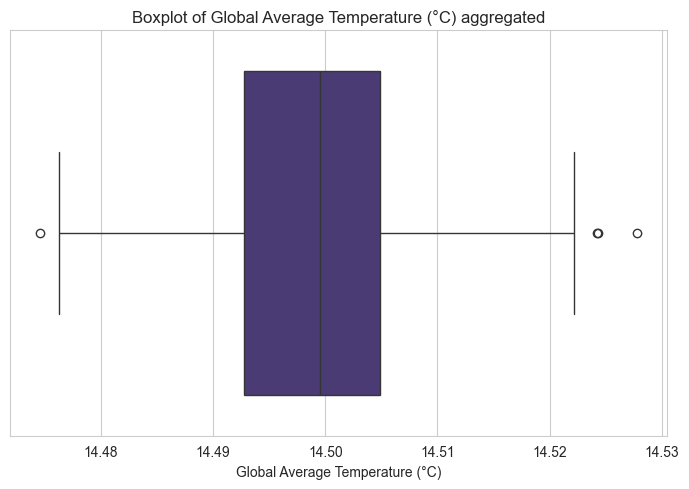

In [ ]:
# Box plot using boxplot
plt.figure(figsize=(7,5))
sns.boxplot(x = aggregated_data[var],  vert = False)
plt.title(f"Boxplot of {var} aggregated")
plt.xlabel(var)
plt.show()

Index(['Year', 'Global Average Temperature (°C)', 'CO2 Concentration (ppm)',
       'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)'],
      dtype='object')


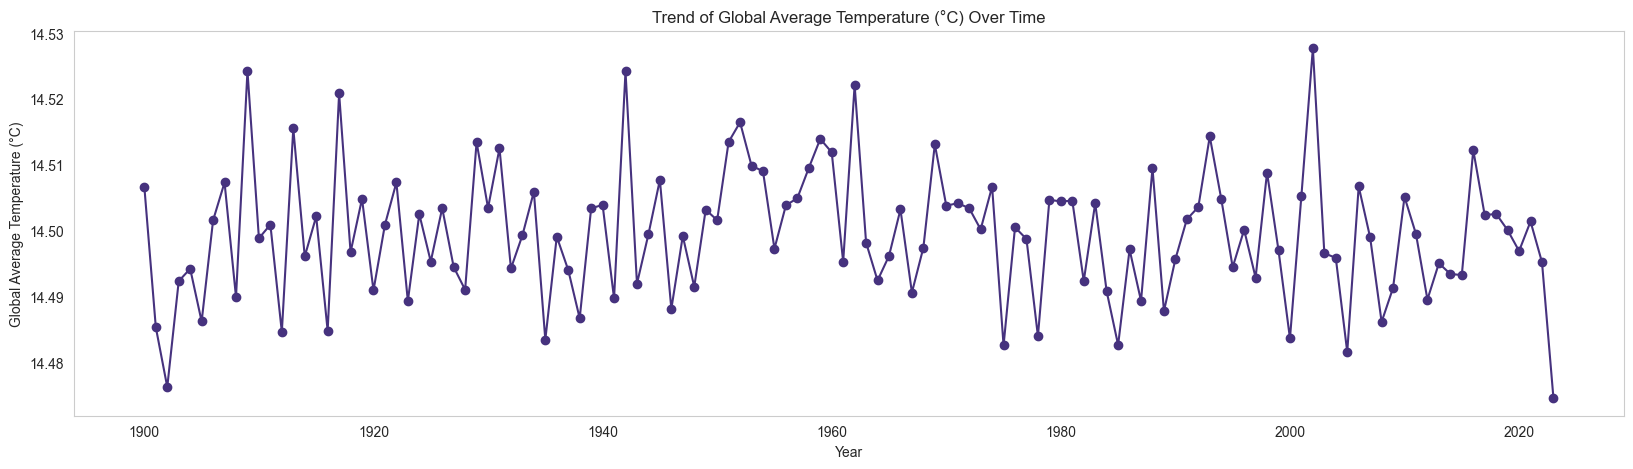

In [34]:
# line plots
print(aggregated_data.columns)

plt.figure(figsize=(20, 5))
plt.plot(aggregated_data['Year'], aggregated_data[var], marker='o')
plt.title(f'Trend of {var} Over Time')
plt.xlabel('Year')
plt.ylabel(var)
plt.grid(False)
plt.show()

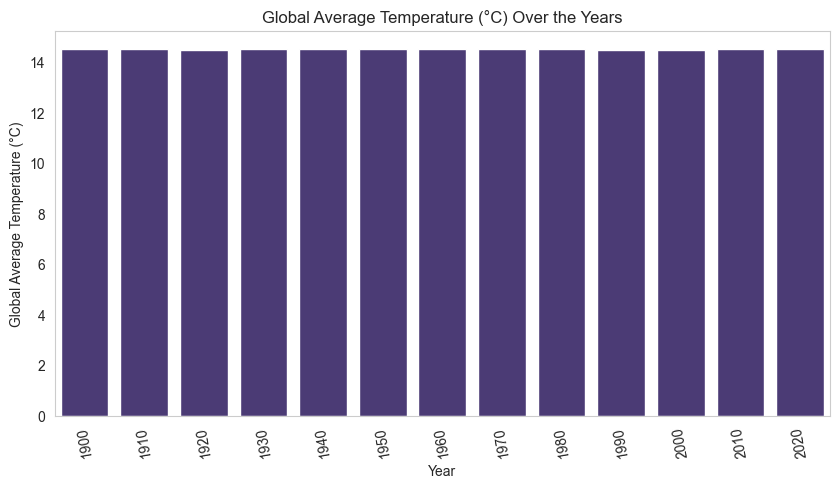

In [35]:
# Barchart
filtered_data = aggregated_data[aggregated_data['Year'] % 10 == 0]
plt.figure(figsize=(10, 5))
sns.barplot(x=filtered_data['Year'], y=filtered_data[var])

# Add labels and title
plt.title(f'{var} Over the Years')
plt.xlabel('Year')
plt.ylabel(var)

# Show plot
plt.xticks(rotation=100)  # Rotate x-axis labels for better visibility
plt.grid(False)
plt.show()

<Figure size 700x500 with 0 Axes>

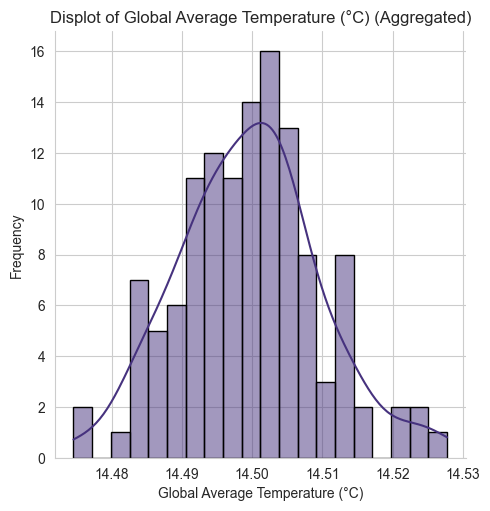

In [36]:
# Displot (Using displot, can combine histogram and KDE)
plt.figure(figsize=(7, 5))
sns.displot(aggregated_data[var], kde=True, bins=20,  edgecolor='black')
plt.title(f'Displot of {var} (Aggregated)')
plt.xlabel(var)
plt.ylabel('Frequency')
plt.show()

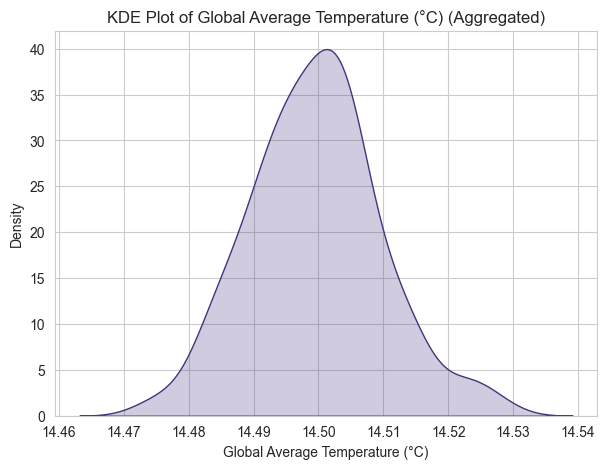

In [37]:
# KDE plot for CO2 concentration ppm
plt.figure(figsize=(7,5))
sns.kdeplot(aggregated_data[var], fill=True)
plt.title(f'KDE Plot of {var} (Aggregated)')
plt.xlabel(var)
plt.ylabel('Density')
plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [ ]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

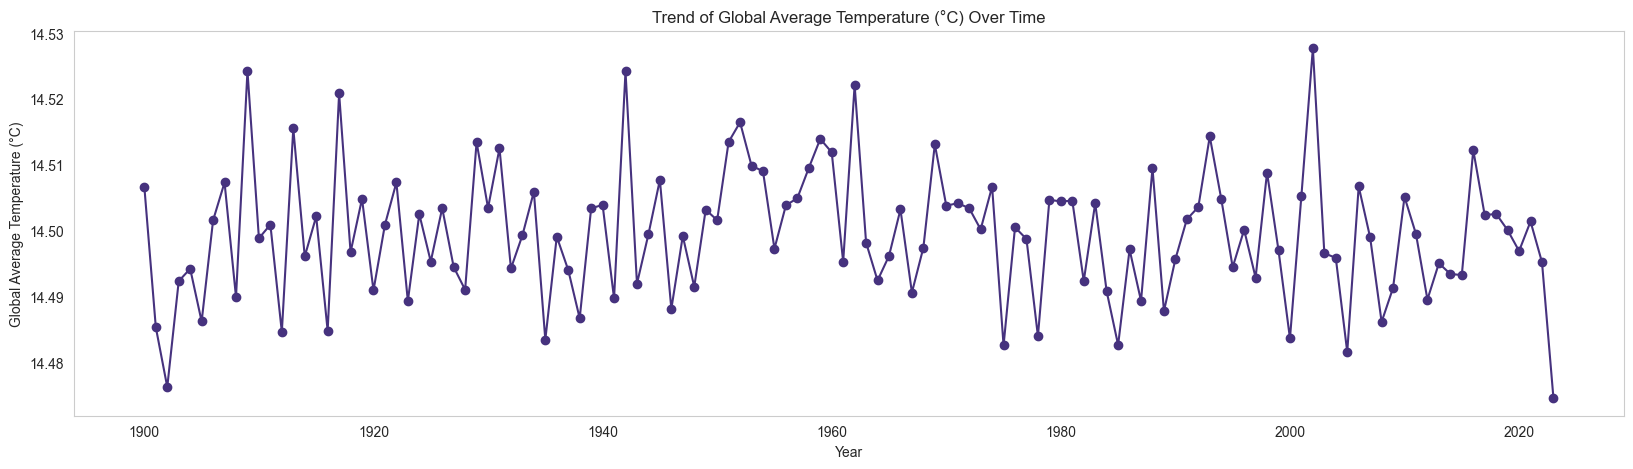

In [84]:
# Line Plot (Trend over time / year bivariate analysis )

# print(aggregated_data.columns)

var = aggregated_data.columns[1]

plt.figure(figsize=(20, 5))
plt.plot(aggregated_data['Year'], aggregated_data[var],  marker='o')
plt.title(f'Trend of {var} Over Time')
plt.xlabel('Year')
plt.ylabel(var)
plt.grid(False)
plt.show()

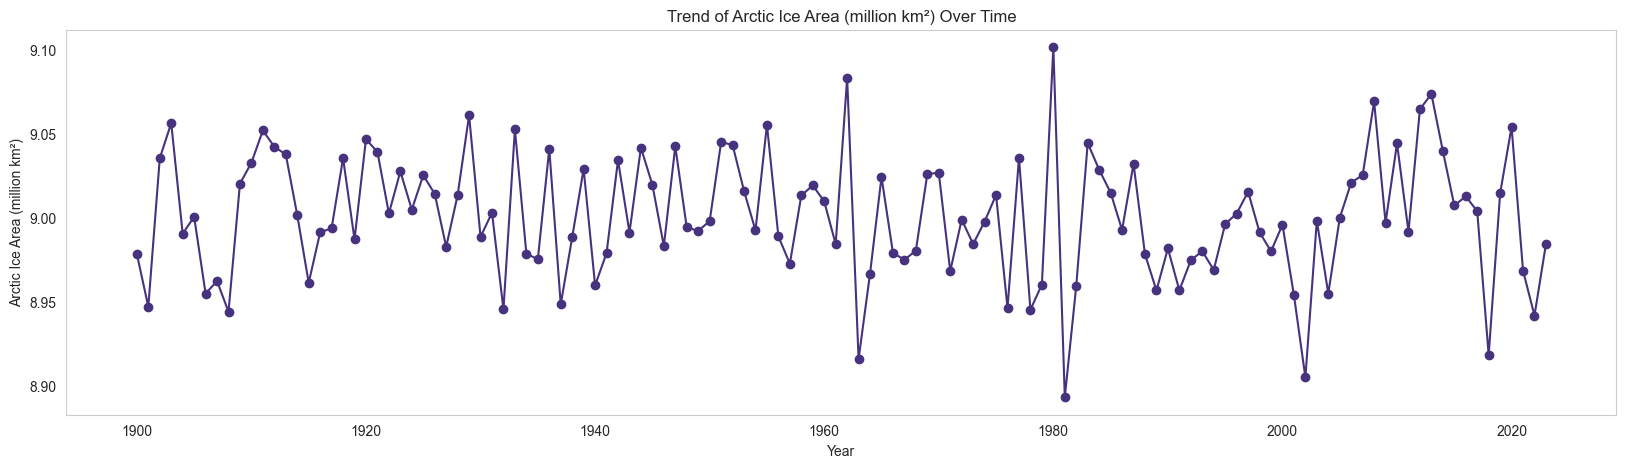

In [85]:
# Line Plot (Trend over time / year bivariate analysis )

# print(aggregated_data.columns)

var = "Arctic Ice Area (million km²)"

plt.figure(figsize=(20, 5))
plt.plot(aggregated_data['Year'], aggregated_data[var],  marker='o')
plt.title(f'Trend of {var} Over Time')
plt.xlabel('Year')
plt.ylabel(var)
plt.grid(False)
plt.show()

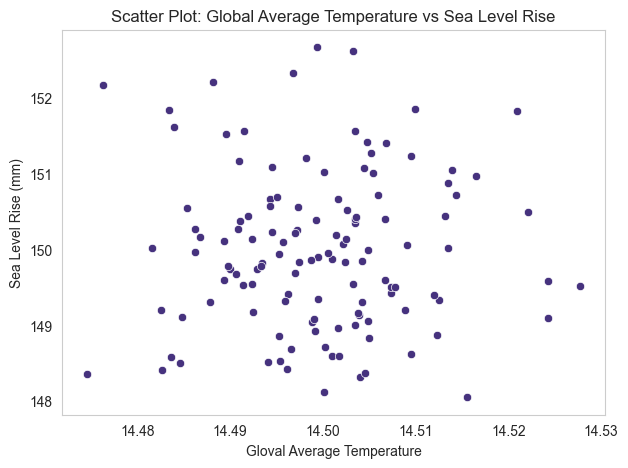

In [30]:
# Scatter Plot Bivariate Analysis (Sea Level Vs Temperatures)

plt.figure(figsize=(7,5))
sns.scatterplot(y = "Sea Level Rise (mm)", x = "Global Average Temperature (°C)", data = aggregated_data, )
# adding features
plt.title("Scatter Plot: Global Average Temperature vs Sea Level Rise")
plt.ylabel("Sea Level Rise (mm)")
plt.xlabel("Gloval Average Temperature")
plt.grid(False)
plt.show()


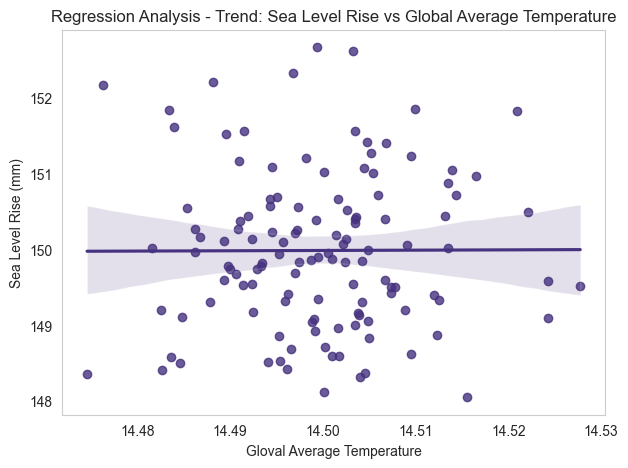

In [32]:
# Regression Analysis - Regression Plot: Arctic Ice Area vs. Global Temperature
# Adding trend to the scatter plot

plt.figure(figsize=(7,5))
sns.regplot(x =  "Global Average Temperature (°C)" , y = "Sea Level Rise (mm)", data = aggregated_data)

# adding features
plt.title("Regression Analysis - Trend: Sea Level Rise vs Global Average Temperature")
plt.ylabel("Sea Level Rise (mm)")
plt.xlabel("Gloval Average Temperature")
plt.grid(False)
plt.show()


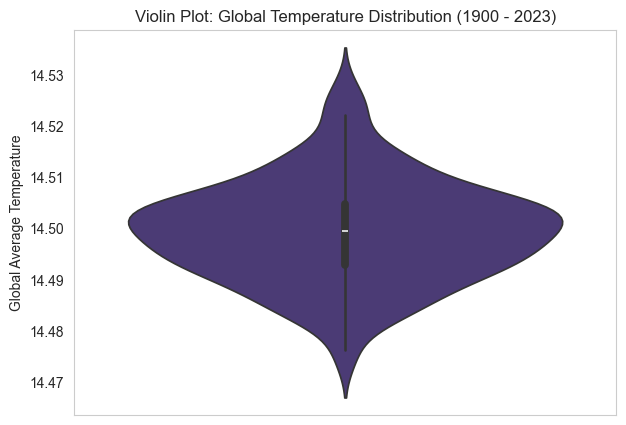

In [33]:
# Violin Plots - Global Temperature over the years
plt.figure(figsize=(7,5))
sns.violinplot(y = aggregated_data["Global Average Temperature (°C)"])

# adding features
plt.title("Violin Plot: Global Temperature Distribution (1900 - 2023)")
plt.ylabel("Global Average Temperature")
plt.grid(False)
plt.xticks(rotation=100)
plt.show()


In [ ]:
# 1987 Yearly Regression Analysis of Global Temp and Sea Level

# data_for_year = individual_year(1987)
# data_for_year



In [67]:
# plt.figure(figsize=(7,5))
# sns.regplot(x =  "Global Average Temperature (°C)" , y = "Sea Level Rise (mm)", data = data_for_year, scatter_kws={"color": "green"}, line_kws={"color": "red"})

# # adding features
# plt.title("Regression Analysis - (1987) Trend: Sea Level Rise WRT Global Average Temperature")
# plt.ylabel("Sea Level Rise (mm)")
# plt.xlabel("Gloval Average Temperature")
# plt.grid(False)
# plt.show()

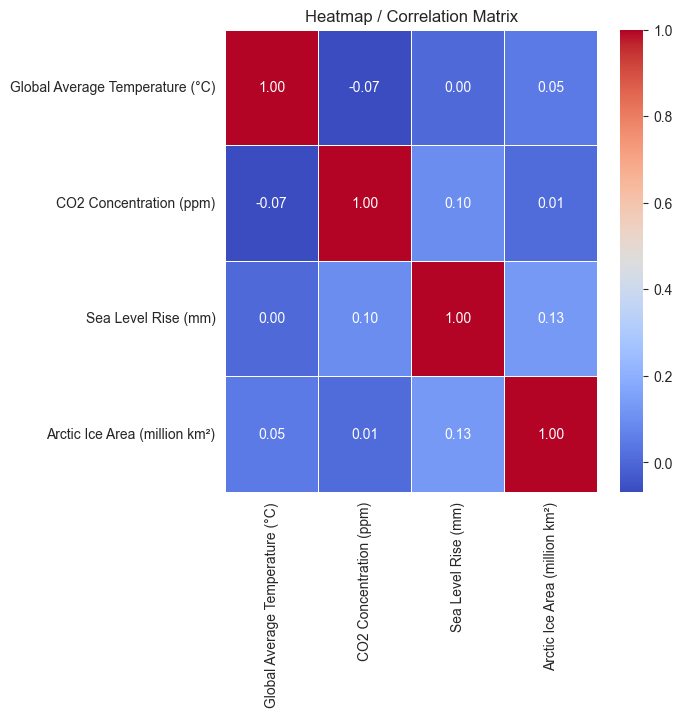

,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Global Average Temperature (°C),1.000000,-0.067980,0.003878,0.047027
CO2 Concentration (ppm),-0.067980,1.000000,0.098212,0.009986
Sea Level Rise (mm),0.003878,0.098212,1.000000,0.129528
Arctic Ice Area (million km²),0.047027,0.009986,0.129528,1.000000


In [80]:
# Heatmap or Correlation matrix

def create_heatmap(df):
	plt.figure(figsize=(6,6))

	corr_matrix = df.corr()

	sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
	plt.title("Heatmap / Correlation Matrix")
	plt.show()

	return corr_matrix

# Drop year from aggregated_data
df_heatmap = aggregated_data.drop(columns=['Year'], errors="ignore")

create_heatmap(df_heatmap)

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [23]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here